In [111]:
"""!pip install pandas
!pip install matplotlib
!pip install seaborn 
!pip install numpy 
!pip install -U scikit-learn
!pip install statsmodels"""

'!pip install pandas\n!pip install matplotlib\n!pip install seaborn \n!pip install numpy \n!pip install -U scikit-learn\n!pip install statsmodels'

CARGA Y LIMPIEZA DE DATOS

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm

In [113]:
archivo = 'C:/Users/ymnl_/Downloads/Excel RRSS-Todos.xlsx'
df_rrss0 = pd.read_excel(archivo)
df_rrss0['Rural es mayor Urba'] = np.where(df_rrss0['POB_RURAL_INEI']-df_rrss0["POB_URBANA_INEI"] > 0, 'Si', 'No')
df_rrss0.head()

,IDDIST,NOMBDEP,NOMBPROV,NOMBDIST,NOM_CAPITAL (LEGAL),COD_ REG_NAT,REGION NATURAL,REGION_NATURAL,TIPO_MUNICIPALIDAD,POB_URBANA_INEI,POB_RURAL_INEI,CLASIFICACION_MUNICIPAL_MEF,GENERACION_MUN_TANIO,RRSS_INDUSTRIAL,MicE,PE,ME,GE,Rural es mayor Urba
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,2,SIERRA,SELVA,PROVINCIAL,38800,891,A,7890.26,Si,630.0,45.0,14.0,7.0,No
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,ASUNCION,2,SIERRA,SELVA,DISTRITAL,135,142,F,36.19,NaN,1.0,NaN,NaN,NaN,Si
2,10204,AMAZONAS,BAGUA,EL PARCO,EL PARCO,3,SELVA ALTA,SELVA,DISTRITAL,655,626,F,170.77,Si,NaN,1.0,NaN,NaN,No
3,10103,AMAZONAS,CHACHAPOYAS,BALSAS,BALSAS,3,SELVA ALTA,SIERRA,DISTRITAL,296,873,G,67.91,NaN,3.0,NaN,NaN,NaN,Si
4,10104,AMAZONAS,CHACHAPOYAS,CHETO,CHETO,2,SIERRA,SIERRA,DISTRITAL,452,253,F,103.70,NaN,1.0,NaN,NaN,NaN,No


In [114]:
#df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].str.replace('.', '').str.replace(',', '.').astype(float)
for idx, col in enumerate (df_rrss0):
    print(f"{idx},Nombre de la columna:{col}")

0,Nombre de la columna:IDDIST
1,Nombre de la columna:NOMBDEP
2,Nombre de la columna:NOMBPROV
3,Nombre de la columna:NOMBDIST
4,Nombre de la columna:NOM_CAPITAL (LEGAL)
5,Nombre de la columna:COD_ REG_NAT
6,Nombre de la columna:REGION NATURAL
7,Nombre de la columna:REGION_NATURAL
8,Nombre de la columna:TIPO_MUNICIPALIDAD
9,Nombre de la columna:POB_URBANA_INEI
10,Nombre de la columna:POB_RURAL_INEI
11,Nombre de la columna:CLASIFICACION_MUNICIPAL_MEF
12,Nombre de la columna:GENERACION_MUN_TANIO
13,Nombre de la columna:RRSS_INDUSTRIAL
14,Nombre de la columna:MicE
15,Nombre de la columna:PE
16,Nombre de la columna:ME
17,Nombre de la columna:GE
18,Nombre de la columna:Rural es mayor Urba


In [115]:
df_rrss=df_rrss0[df_rrss0["Rural es mayor Urba"]=="Si"]


df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].fillna(0)
df_rrss.iloc[:,14:18] = df_rrss.iloc[:,14:61].fillna(0)

#Convertirmos lo valores que queremos a tipo float
#df_rrss[["MiPyME-COMERCIO","GE-MANUFACTURA","MiPyME-MANUFACTURA","GENERACION_MUN_TANIO"]].astype(float)


#Agregamos las transformaciones con logaritrmo
df_rrss["Log Poblacion Urbana"]=np.log(df_rrss["POB_URBANA_INEI"]+1)
df_rrss["Log Poblacion Rural"]=np.log(df_rrss["POB_RURAL_INEI"]+1)
df_rrss["Log Residuos solidos municipales"]=np.log(df_rrss["GENERACION_MUN_TANIO"]+1)


print(df_rrss.info())

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 1 to 999
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDDIST                            618 non-null    int64  
 1   NOMBDEP                           618 non-null    object 
 2   NOMBPROV                          618 non-null    object 
 3   NOMBDIST                          618 non-null    object 
 4   NOM_CAPITAL (LEGAL)               618 non-null    object 
 5   COD_ REG_NAT                      618 non-null    int64  
 6   REGION NATURAL                    618 non-null    object 
 7   REGION_NATURAL                    618 non-null    object 
 8   TIPO_MUNICIPALIDAD                618 non-null    object 
 9   POB_URBANA_INEI                   618 non-null    int64  
 10  POB_RURAL_INEI                    618 non-null    int64  
 11  CLASIFICACION_MUNICIPAL_MEF       618 non-null    object 
 12  GENERACION_MU

C:\Users\ymnl_\AppData\Local\Temp\ipykernel_30112\4196627457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].fillna(0)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_30112\4196627457.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss["Log Poblacion Urbana"]=np.log(df_rrss["POB_URBANA_INEI"]+1)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_30112\4196627457.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [116]:
#transformamos a logaritmo todas las columnas para realizar la covarianza
cols_a_log=df_rrss.columns[14:18]
for col in cols_a_log:
    df_rrss[col + '_log'] = np.log(df_rrss[col]+1)

#Vemos en que posicion se encuentran nuestras columnas calculdadas    
for idx, col in enumerate (df_rrss):
    print(f"{idx},Nombre de la columna:{col}")

0,Nombre de la columna:IDDIST
1,Nombre de la columna:NOMBDEP
2,Nombre de la columna:NOMBPROV
3,Nombre de la columna:NOMBDIST
4,Nombre de la columna:NOM_CAPITAL (LEGAL)
5,Nombre de la columna:COD_ REG_NAT
6,Nombre de la columna:REGION NATURAL
7,Nombre de la columna:REGION_NATURAL
8,Nombre de la columna:TIPO_MUNICIPALIDAD
9,Nombre de la columna:POB_URBANA_INEI
10,Nombre de la columna:POB_RURAL_INEI
11,Nombre de la columna:CLASIFICACION_MUNICIPAL_MEF
12,Nombre de la columna:GENERACION_MUN_TANIO
13,Nombre de la columna:RRSS_INDUSTRIAL
14,Nombre de la columna:MicE
15,Nombre de la columna:PE
16,Nombre de la columna:ME
17,Nombre de la columna:GE
18,Nombre de la columna:Rural es mayor Urba
19,Nombre de la columna:Log Poblacion Urbana
20,Nombre de la columna:Log Poblacion Rural
21,Nombre de la columna:Log Residuos solidos municipales
22,Nombre de la columna:MicE_log
23,Nombre de la columna:PE_log
24,Nombre de la columna:ME_log
25,Nombre de la columna:GE_log


C:\Users\ymnl_\AppData\Local\Temp\ipykernel_30112\3935766929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss[col + '_log'] = np.log(df_rrss[col]+1)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_30112\3935766929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss[col + '_log'] = np.log(df_rrss[col]+1)
C:\Users\ymnl_\AppData\Local\Temp\ipykernel_30112\3935766929.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [117]:
df_rrss_sinNaN= df_rrss.dropna(subset=["TIPO_MUNICIPALIDAD"])

#Vemos que categorías hay en tipo de municipalidad
muni= df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].unique()
print(muni)



['DISTRITAL' 'PROVINCIAL']


In [118]:
#Reemplazamos los valores de distrital y provincial
valores={"DISTRITAL":1,"PROVINCIAL":0}
df_rrss_sinNaN["TIPO_MUNICIPALIDAD CONT"]=df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].map(valores)
print(df_rrss_sinNaN)

     IDDIST   NOMBDEP     NOMBPROV             NOMBDIST NOM_CAPITAL (LEGAL)  \
1     10102  AMAZONAS  CHACHAPOYAS             ASUNCION            ASUNCION   
3     10103  AMAZONAS  CHACHAPOYAS               BALSAS              BALSAS   
5     10203  AMAZONAS        BAGUA             COPALLIN            COPALLIN   
6     10105  AMAZONAS  CHACHAPOYAS            CHILIQUIN           CHILIQUIN   
7     10106  AMAZONAS  CHACHAPOYAS          CHUQUIBAMBA         CHUQUIBAMBA   
..      ...       ...          ...                  ...                 ...   
993  101005   HUANUCO   LAURICOCHA               RONDOS              RONDOS   
995  101007   HUANUCO   LAURICOCHA  SAN MIGUEL DE CAURI               CAURI   
996  101101   HUANUCO    YAROWILCA           CHAVINILLO          CHAVINILLO   
998  101103   HUANUCO    YAROWILCA           CHACABAMBA          CHACABAMBA   
999  101104   HUANUCO    YAROWILCA     APARICIO POMARES              CHUPAN   

     COD_ REG_NAT REGION NATURAL REGION_NATURAL TIP

In [119]:
#Revisamos los estadísticos de las principales columnas a evaluar
print(df_rrss_sinNaN.describe())

              IDDIST  COD_ REG_NAT  POB_URBANA_INEI  POB_RURAL_INEI  \
count     618.000000    618.000000       618.000000      618.000000   
mean    55776.470874      2.114887      1285.042071     3761.720065   
std     28996.392145      0.513738      2186.819489     4631.012781   
min     10102.000000      1.000000        51.000000      109.000000   
25%     30131.500000      2.000000       315.000000     1063.750000   
50%     60303.500000      2.000000       630.500000     2311.500000   
75%     81002.750000      2.000000      1405.500000     4619.500000   
max    101104.000000      4.000000     22729.000000    46970.000000   

       GENERACION_MUN_TANIO        MicE          PE          ME          GE  \
count            618.000000  618.000000  618.000000  618.000000  618.000000   
mean             305.620777    6.618123    0.792880    0.195793    0.134304   
std              563.321847   18.935953    2.103285    0.667986    0.458757   
min               11.700000    0.000000    0

In [120]:
#Verificamos que columnas son las que presentan un valor nan
columnas_nan=df_rrss_sinNaN.isna().any()
print(columnas_nan)

IDDIST                              False
NOMBDEP                             False
NOMBPROV                            False
NOMBDIST                            False
NOM_CAPITAL (LEGAL)                 False
COD_ REG_NAT                        False
REGION NATURAL                      False
REGION_NATURAL                      False
TIPO_MUNICIPALIDAD                  False
POB_URBANA_INEI                     False
POB_RURAL_INEI                      False
CLASIFICACION_MUNICIPAL_MEF         False
GENERACION_MUN_TANIO                False
RRSS_INDUSTRIAL                      True
MicE                                False
PE                                  False
ME                                  False
GE                                  False
Rural es mayor Urba                 False
Log Poblacion Urbana                False
Log Poblacion Rural                 False
Log Residuos solidos municipales    False
MicE_log                            False
PE_log                            

ANALISIS EXPLORATORIO DE DATOS

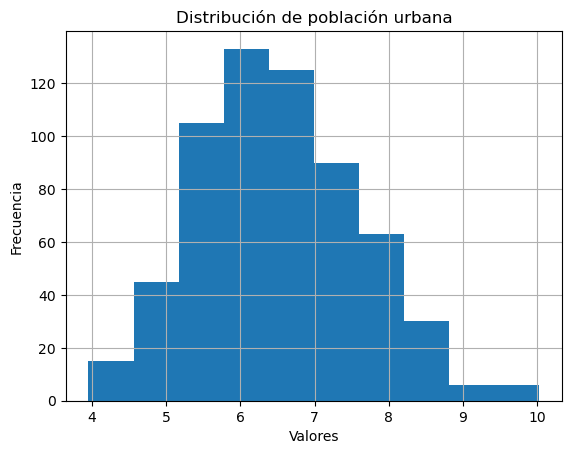

In [121]:
#Poblacion rural
df_rrss_sinNaN["Log Poblacion Urbana"].hist()
plt.title("Distribución de población urbana")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


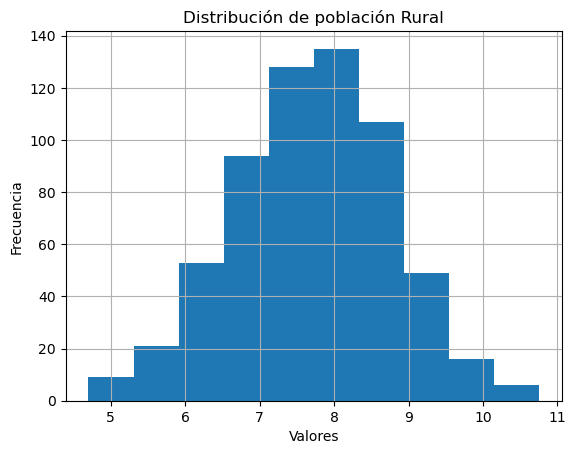

In [122]:
#Población urbana
df_rrss_sinNaN["Log Poblacion Rural"].hist()
plt.title("Distribución de población Rural")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


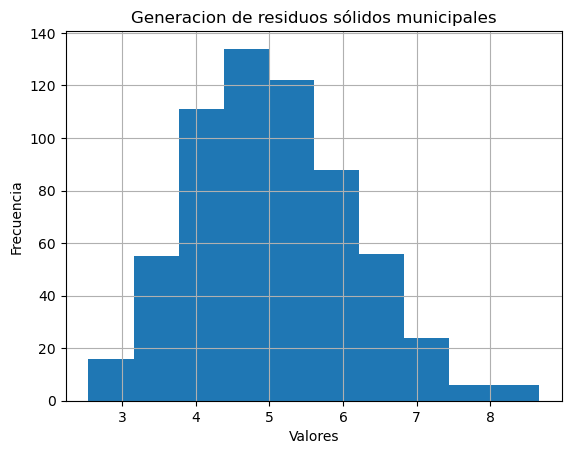

In [123]:
#Generacion de residuos municipales
df_rrss_sinNaN["Log Residuos solidos municipales"].hist()
plt.title("Generacion de residuos sólidos municipales")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

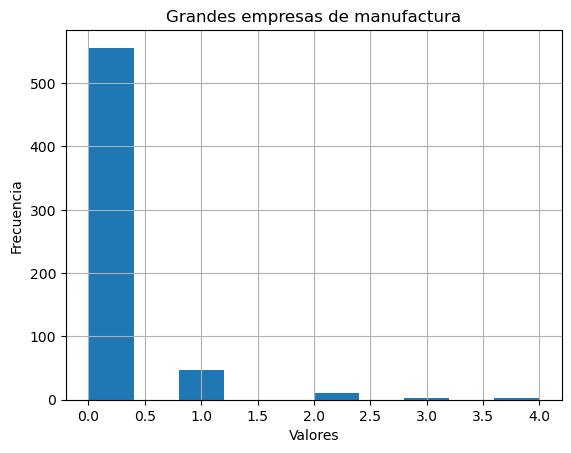

In [124]:
#Histograma de GE-Manufactura
df_rrss_sinNaN["GE"].hist()
plt.title("Grandes empresas de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

In [125]:
"""#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-COMERCIO"].hist()
plt.title("Mypimes de comercio")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()"""

'#Histograma de Mipyme-Manufactura\ndf_rrss_sinNaN["Log MiPyME-COMERCIO"].hist()\nplt.title("Mypimes de comercio")\nplt.xlabel("Valores")\nplt.ylabel("Frecuencia") \nplt.show()'

In [126]:
"""#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-MANUFACTURA"].hist()
plt.title("Mypimes de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()"""

'#Histograma de Mipyme-Manufactura\ndf_rrss_sinNaN["Log MiPyME-MANUFACTURA"].hist()\nplt.title("Mypimes de manufactura")\nplt.xlabel("Valores")\nplt.ylabel("Frecuencia") \nplt.show()'

In [127]:
columnas_pob_residuos=df_rrss_sinNaN[["Log Poblacion Urbana",
                                    "Log Poblacion Rural",
                                    "Log Residuos solidos municipales"                    
                                    ]]

columnas_empresas=df_rrss_sinNaN.iloc[:,22:26]
df_var=pd.concat([columnas_pob_residuos,columnas_empresas], axis=1)            
print(df_var)

#Vemos en que posicion se encuentran nuestras columnas del data frame que vamos a trabajar    
for idx, col in enumerate (df_var):
    print(f"{idx},Nombre de la columna:{col}")

     Log Poblacion Urbana  Log Poblacion Rural  \
1                4.912655             4.962845   
3                5.693732             6.773080   
5                7.709757             7.755767   
6                5.056246             6.054439   
7                6.142037             7.285507   
..                    ...                  ...   
993              6.854355             7.685703   
995              7.192934             8.168486   
996              7.469084             7.878155   
998              5.141664             6.519147   
999              7.095893             8.119994   

     Log Residuos solidos municipales  MicE_log    PE_log    ME_log    GE_log  
1                            3.616040  0.693147  0.000000  0.000000  0.000000  
3                            4.232801  1.386294  0.000000  0.000000  0.000000  
5                            6.261530  1.098612  0.693147  0.000000  0.000000  
6                            3.605226  0.693147  0.000000  0.000000  0.000000  

In [128]:
estandarizar = StandardScaler()
estandarizar_variables = estandarizar.fit_transform(df_var)
cov_matrix = np.cov(estandarizar_variables, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, index=df_var.columns, columns=df_var.columns)
print(cov_df)

                                  Log Poblacion Urbana  Log Poblacion Rural  \
Log Poblacion Urbana                          1.001621             0.737349   
Log Poblacion Rural                           0.737349             1.001621   
Log Residuos solidos municipales              0.984842             0.736539   
MicE_log                                      0.630750             0.519510   
PE_log                                        0.411853             0.440818   
ME_log                                        0.498242             0.416009   
GE_log                                        0.459493             0.373107   

                                  Log Residuos solidos municipales  MicE_log  \
Log Poblacion Urbana                                      0.984842  0.630750   
Log Poblacion Rural                                       0.736539  0.519510   
Log Residuos solidos municipales                          1.001621  0.630553   
MicE_log                                       

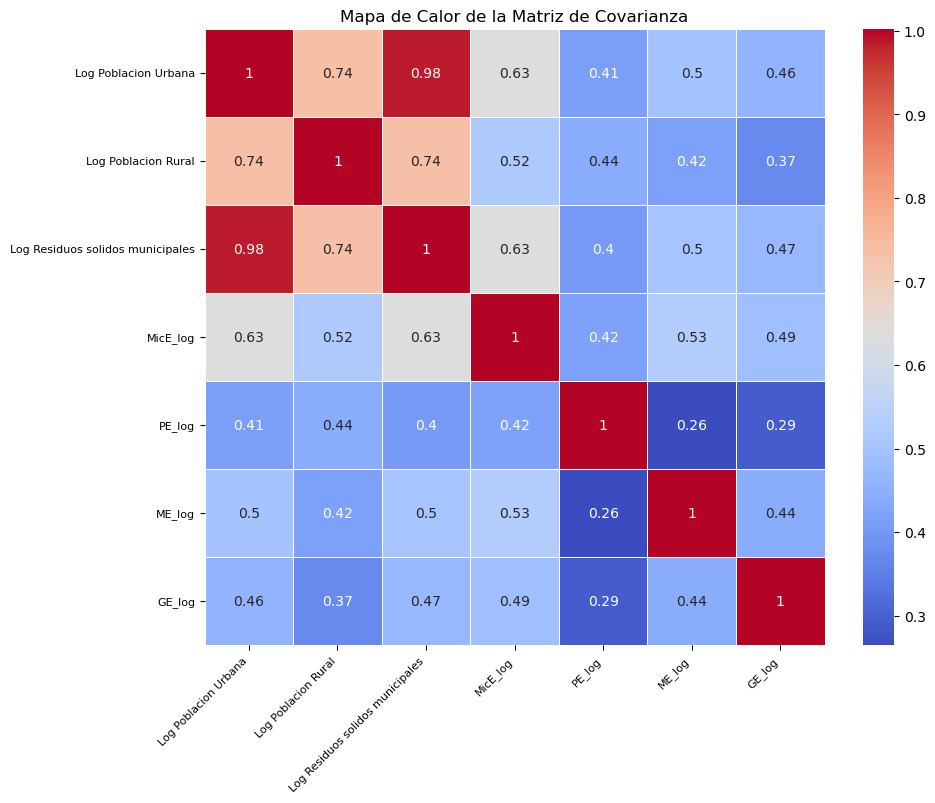

In [129]:


# Crear el mapa de calor
plt.figure(figsize=(10, 8))
heatmap=sns.heatmap(cov_df, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', mask=cov_df.isnull())

# Ajustar el tamaño de la fuente de las etiquetas de los ejes
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)
# Eliminar etiquetas en blanco
heatmap.set_xticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_xticklabels()])
heatmap.set_yticklabels([label if not label.get_text().isspace() else '' for label in heatmap.get_yticklabels()])

# Mostrar el mapa de calor
plt.title('Mapa de Calor de la Matriz de Covarianza')
plt.show()



In [130]:

#Todas las variables
X = df_var.iloc[:,list(range(0,1))+list(range(3,7))]
y = df_var["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                                   OLS Regression Results                                   
Dep. Variable:     Log Residuos solidos municipales   R-squared:                       0.967
Model:                                          OLS   Adj. R-squared:                  0.967
Method:                               Least Squares   F-statistic:                     3623.
Date:                              Thu, 29 Aug 2024   Prob (F-statistic):               0.00
Time:                                      23:41:18   Log-Likelihood:                 127.79
No. Observations:                               618   AIC:                            -243.6
Df Residuals:                                   612   BIC:                            -217.0
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
                           coef    std err          t      P>|t|      

In [131]:
"""#Las variables con p<0.05
X=df_var[["GE-Fabricación de productos elaborados de metal, excepto maquinaria y equipo_log",
"MiPyme-Fabricación de prendas de vestir; adobo y teñido de pieles_log", 
"MiPyme-Fabricación de otros tipos de equipo de transporte_log"]]
y = df_var["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())"""


'#Las variables con p<0.05\nX=df_var[["GE-Fabricación de productos elaborados de metal, excepto maquinaria y equipo_log",\n"MiPyme-Fabricación de prendas de vestir; adobo y teñido de pieles_log", \n"MiPyme-Fabricación de otros tipos de equipo de transporte_log"]]\ny = df_var["Log Residuos solidos municipales"]\n\n# Agregar una constante a las variables independientes\nX = sm.add_constant(X)\n\n# Ajustar el modelo de regresión lineal\nmodel = sm.OLS(y, X).fit()\n\n# Resumen del modelo\nprint(model.summary())'

Coeficientes: [ 0.          0.9744112   0.01024904 -0.01361223  0.0325987   0.07814821]
Intercepto: -1.3226925703435084
MSE: 0.03871859475172374
R^2: 0.9673213555838043


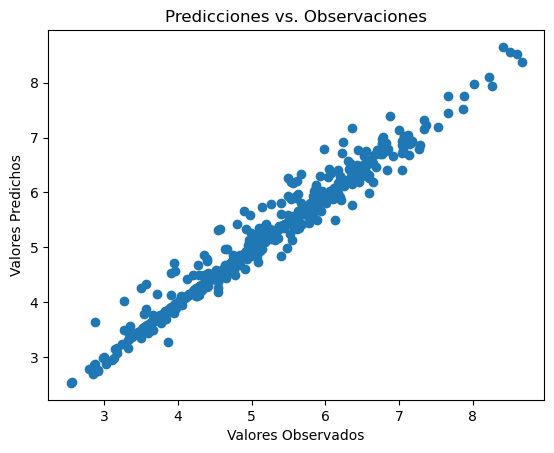

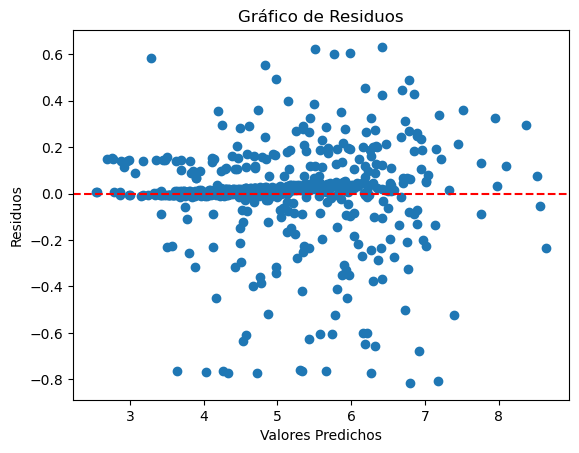

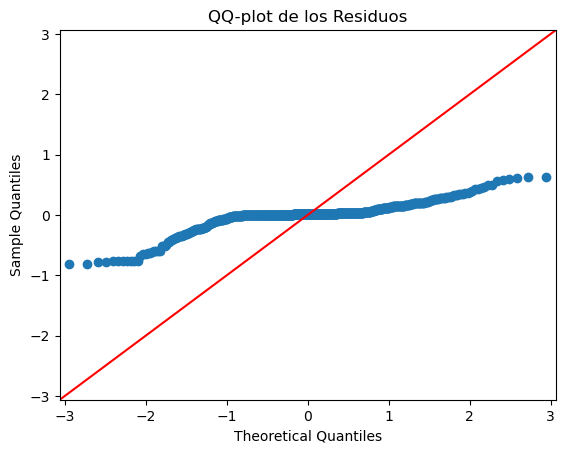

In [132]:
#Verificar la regresion:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los coeficientes y el intercepto
coeficientes = modelo.coef_
intercepto = modelo.intercept_
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

# Predecir los valores de la variable dependiente
y_pred = modelo.predict(X)

# Evaluar el modelo
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("MSE:", mse)
print("R^2:", r2)

# Gráfico de Predicciones vs. Observaciones
plt.scatter(y, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

# Gráfico de Residuos
residuos = y - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#Grafico de qqplot
sm.qqplot(residuos, line='45')
plt.title('QQ-plot de los Residuos')
plt.show()

BUSQUEMOS UN PCA

In [133]:
columnas_sin_residuos=df_rrss_sinNaN[["Log Poblacion Urbana",
                                    "Log Poblacion Rural",                   
                                    ]]

columnas_empresas=df_rrss_sinNaN.iloc[:,22:26]
df_var_sin_rrss=pd.concat([columnas_sin_residuos,columnas_empresas], axis=1)            
print(df_var_sin_rrss)

#Vemos en que posicion se encuentran nuestras columnas del data frame que vamos a trabajar    
for idx, col in enumerate (df_var_sin_rrss):
    print(f"{idx},Nombre de la columna:{col}")

     Log Poblacion Urbana  Log Poblacion Rural  MicE_log    PE_log    ME_log  \
1                4.912655             4.962845  0.693147  0.000000  0.000000   
3                5.693732             6.773080  1.386294  0.000000  0.000000   
5                7.709757             7.755767  1.098612  0.693147  0.000000   
6                5.056246             6.054439  0.693147  0.000000  0.000000   
7                6.142037             7.285507  0.693147  0.000000  0.000000   
..                    ...                  ...       ...       ...       ...   
993              6.854355             7.685703  1.098612  1.098612  0.000000   
995              7.192934             8.168486  1.945910  0.000000  0.000000   
996              7.469084             7.878155  1.609438  0.693147  0.693147   
998              5.141664             6.519147  0.693147  0.000000  0.000000   
999              7.095893             8.119994  0.693147  0.693147  0.000000   

       GE_log  
1    0.000000  
3    0.

In [134]:
#Estandarizamos para nuestro PCA
estandarizar = StandardScaler()
estandarizar_variables = estandarizar.fit_transform(df_var_sin_rrss)
cov_matrix = np.cov(estandarizar_variables, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, index=df_var_sin_rrss.columns, columns=df_var_sin_rrss.columns)
print(cov_df)

                      Log Poblacion Urbana  Log Poblacion Rural  MicE_log  \
Log Poblacion Urbana              1.001621             0.737349  0.630750   
Log Poblacion Rural               0.737349             1.001621  0.519510   
MicE_log                          0.630750             0.519510  1.001621   
PE_log                            0.411853             0.440818  0.418932   
ME_log                            0.498242             0.416009  0.528835   
GE_log                            0.459493             0.373107  0.486361   

                        PE_log    ME_log    GE_log  
Log Poblacion Urbana  0.411853  0.498242  0.459493  
Log Poblacion Rural   0.440818  0.416009  0.373107  
MicE_log              0.418932  0.528835  0.486361  
PE_log                1.001621  0.264254  0.291618  
ME_log                0.264254  1.001621  0.442172  
GE_log                0.291618  0.442172  1.001621  


In [135]:
#Creamos nuestro PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(estandarizar_variables)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'], index=df_rrss_sinNaN.index)
print(pca_df)

          PC1       PC2       PC3
1   -2.600477 -1.090046  1.134275
3   -1.211159 -0.563634  0.081713
5    0.408314  0.863822 -0.255006
6   -2.087157 -0.761220  0.603691
7   -1.107349 -0.303874 -0.329195
..        ...       ...       ...
993  0.279677  1.305056  0.573306
995  0.260127 -0.076398 -1.053601
996  2.458212 -1.539036  1.072730
998 -1.858089 -0.618959  0.369019
999  0.115498  0.952365 -0.206419

[618 rows x 3 columns]


[0.55670831 0.13422795 0.1074285 ]


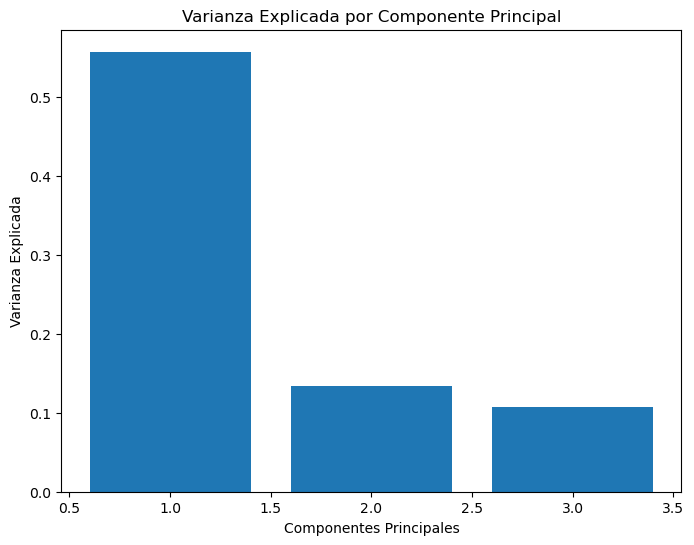

In [136]:
#Creames el gráfico de cargas
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

# Crear el gráfico de varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

In [137]:
componentes_pca=pd.DataFrame(pca.components_,columns=df_var_sin_rrss.columns, index=['PC1', 'PC2','PC3'])
print(componentes_pca)

     Log Poblacion Urbana  Log Poblacion Rural  MicE_log    PE_log    ME_log  \
PC1              0.468678             0.435201  0.444867  0.332682  0.384010   
PC2              0.101131             0.304326 -0.102572  0.663597 -0.483447   
PC3             -0.391063            -0.461817  0.035184  0.597791 -0.056773   

       GE_log  
PC1  0.367277  
PC2 -0.461037  
PC3  0.521516  


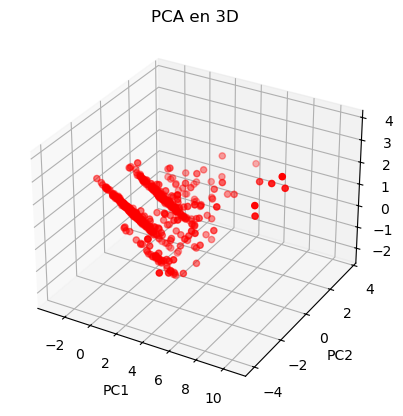

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='r', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title("PCA en 3D")

plt.show()


In [139]:
df_rrss_sinNaN_PCA= pd.concat([df_rrss_sinNaN, pca_df], axis=1)
print(df_rrss_sinNaN_PCA.info())

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 1 to 999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDDIST                            618 non-null    int64  
 1   NOMBDEP                           618 non-null    object 
 2   NOMBPROV                          618 non-null    object 
 3   NOMBDIST                          618 non-null    object 
 4   NOM_CAPITAL (LEGAL)               618 non-null    object 
 5   COD_ REG_NAT                      618 non-null    int64  
 6   REGION NATURAL                    618 non-null    object 
 7   REGION_NATURAL                    618 non-null    object 
 8   TIPO_MUNICIPALIDAD                618 non-null    object 
 9   POB_URBANA_INEI                   618 non-null    int64  
 10  POB_RURAL_INEI                    618 non-null    int64  
 11  CLASIFICACION_MUNICIPAL_MEF       618 non-null    object 
 12  GENERACION_MU

In [140]:
#Regresion para con el PCA:
#Todas las variables
X_pca = df_rrss_sinNaN_PCA.iloc[:,list(range(27,30))]
y1 = df_rrss_sinNaN_PCA["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X_pca = sm.add_constant(X_pca)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y1, X_pca).fit()

# Resumen del modelo
print(model.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Log Residuos solidos municipales   R-squared:                       0.827
Model:                                          OLS   Adj. R-squared:                  0.826
Method:                               Least Squares   F-statistic:                     979.2
Date:                              Thu, 29 Aug 2024   Prob (F-statistic):          1.74e-233
Time:                                      23:41:19   Log-Likelihood:                -386.96
No. Observations:                               618   AIC:                             781.9
Df Residuals:                                   614   BIC:                             799.6
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

Coeficientes: [ 0.          0.50828168  0.09133268 -0.41372026]
Intercepto: 5.043792390871183
MSE: 0.2048284843747823
R^2: 0.8271239633020561


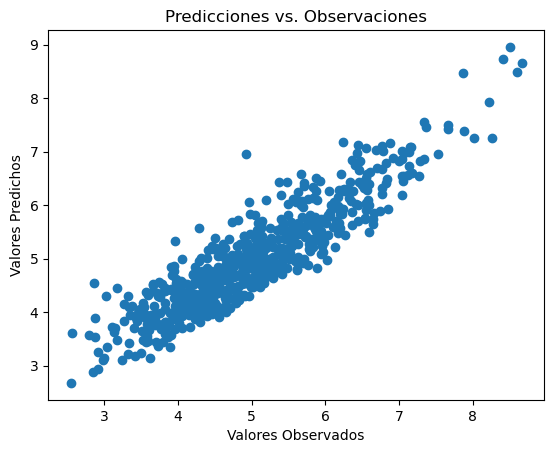

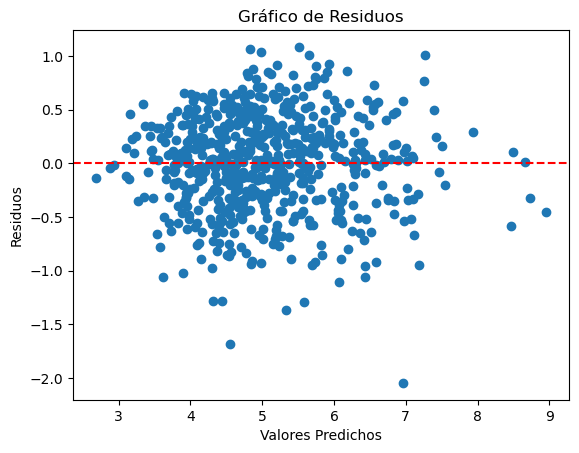

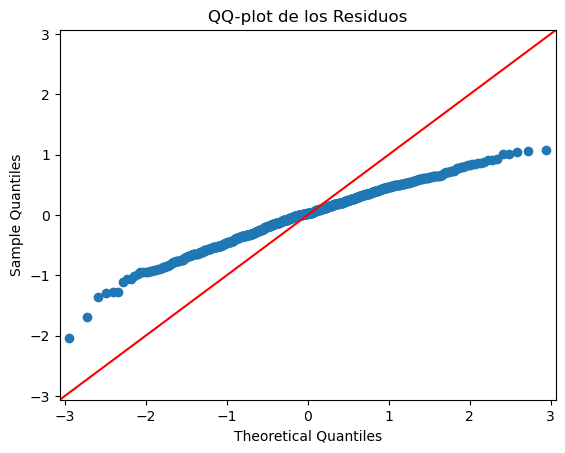

In [141]:
#regresión y supuestos:

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_pca, y1)

# Obtener los coeficientes y el intercepto
coeficientes = modelo.coef_
intercepto = modelo.intercept_
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

# Predecir los valores de la variable dependiente
y_pred = modelo.predict(X_pca)

# Evaluar el modelo
mse = mean_squared_error(y1, y_pred)
r2 = r2_score(y1, y_pred)
print("MSE:", mse)
print("R^2:", r2)

# Gráfico de Predicciones vs. Observaciones
plt.scatter(y1, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Observaciones')
plt.show()

# Gráfico de Residuos
residuos = y1 - y_pred
plt.scatter(y_pred, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#Grafico de qqplot
sm.qqplot(residuos, line='45')
plt.title('QQ-plot de los Residuos')
plt.show()

In [144]:
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from patsy import dmatrices

# Realizar la prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_pca)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))



# Realizar la prueba de Shapiro-Wilk
shapiro_test = shapiro(residuos)
print('Estadístico de Shapiro-Wilk:', shapiro_test[0])
print('p-valor de Shapiro-Wilk:', shapiro_test[1])



{'LM Statistic': 8.878588802586856, 'LM-Test p-value': 0.03094943529015729, 'F-Statistic': 2.9832331314003193, 'F-Test p-value': 0.03075730951375945}
Estadístico de Shapiro-Wilk: 0.9880018124925073
p-valor de Shapiro-Wilk: 5.90536148729426e-05


NameError: name 'df' is not defined

In [143]:

"""#Todas las variables
X = df_var.iloc[:,list(range(0,1))+list(range(3,50))]
y = df_var["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())"""


'#Todas las variables\nX = df_var.iloc[:,list(range(0,1))+list(range(3,50))]\ny = df_var["Log Residuos solidos municipales"]\n\n# Agregar una constante a las variables independientes\nX = sm.add_constant(X)\n\n# Ajustar el modelo de regresión lineal\nmodel = sm.OLS(y, X).fit()\n\n# Resumen del modelo\nprint(model.summary())'